# <b>Twitter Sentiment Analysis</b>

In [1]:
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('twitter_training.csv')
data.columns = ['code','entity','vote','tweet']
data.sample(10)

,code,entity,vote,tweet
32947,6454,Fortnite,Positive,"It makes me happier since I kept watching, not..."
59205,3348,Facebook,Irrelevant,what in the fuck. Ima Will build me one of the...
22470,4247,CS-GO,Irrelevant,@ DraftKings you're csgo is not being updated
22426,4239,CS-GO,Positive,you miss CSGO
30266,7202,LeagueOfLegends,Negative,I play league of legends now...... Still bad....
52723,10657,RedDeadRedemption(RDR),Positive,It's amazing...
27549,1144,AssassinsCreed,Positive,IF HOLY SHIT
26447,943,AssassinsCreed,Positive,The way Ubisoft is announcing the new Assassin...
86,2415,Borderlands,Positive,FUCK YESSSSSSSS<unk>
24576,4619,Google,Neutral,"Google's thank you message for doctors, nurses..."


In [3]:
# Tamaño de los datos
len(data)

74681

In [4]:
# Valores úinicos por columna
data.nunique()

code      12447
entity       32
vote          4
tweet     69490
dtype: int64

In [5]:
# Valores nulos
data.isnull().sum()

code        0
entity      0
vote        0
tweet     686
dtype: int64

In [6]:
# Borrado de filas con valores nulos
data.dropna(axis=0, inplace=True)

## Natural Language Processing

In [7]:
# Funciones propias
import functions

data['tweet'] = data['tweet'].apply(functions.cleanText)  # Limpieza de los tweets
data['subjetividad'] = data['tweet'].apply(functions.getSubjectivity) # Subjetividad de los tweets
data['polaridad'] = data['tweet'].apply(functions.getPolarity)  # Polaridad de los tweets
data.sample(20)

,code,entity,vote,tweet,subjetividad,polaridad
50921,6340,FIFA,Negative,One game of fifa tonight and I’m done. Pressin...,0.306250,0.306250
30602,7258,LeagueOfLegends,Neutral,The SFL IS a league of hearts!,0.000000,0.000000
19403,12523,WorldOfCraft,Negative,Hearthdton > Wow fatos,1.000000,1.000000
3465,1800,CallOfDutyBlackopsColdWar,Neutral,""" Movement through speeds are better than spee...",0.243750,0.243750
300,2451,Borderlands,Positive,Psycho Krieg and the Fantastic Fustercluck is ...,0.671667,0.671667
36623,8284,Microsoft,Positive,This is a great tool. I love the Samsung Elect...,0.675000,0.675000
60955,4848,GrandTheftAuto(GTA),Irrelevant,The first is like the crap you see in horror m...,0.226667,0.226667
72275,11183,TomClancysGhostRecon,Negative,_UK what the hell is goin on been trying 4 2da...,0.500000,0.500000
70672,10906,TomClancysGhostRecon,Positive,the jump shot is stunning.,1.000000,1.000000
42574,10104,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,i got the best advise this day helping me to c...,0.475000,0.475000


## WordCloud

In [32]:
tweets = ''.join([w.lower() for w in data["tweet"]])

#allWords = re.split(r'[\ \,\.]', tweets)

#stopwd = stopwords.words('english')
#allWords = [w for w in allWords if w not in stopwd and len(w)>2]
#allWords[:20]

'i am coming to the b'

In [30]:
wordCloud = WordCloud(width=600, height=400).generate(tweets)

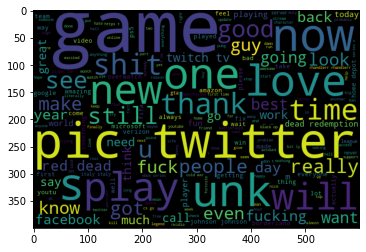

In [31]:
plt.imshow(wordCloud)
plt.show()